In [2]:
# load packages 
library(reshape2)
library(ggplot2)
library(lme4)
library(lmerTest)
library(Rmisc)
library(plyr)
library(gridExtra)
library(ggridges)
library(gridGraphics)
library(grid)
library(broom)
library(ggbeeswarm)
library(brms)
library(ggpattern)
library(brms)

In [3]:
# move to data folder
setwd('data/')

In [17]:
# read in data files
choice<-read.csv('data_choice.csv')
ratings<-read.csv('data_ratings.csv')
foodRatings<-read.csv('data_foodRatings.csv')

# model files
model_preds<-read.csv('model_predictions.csv')

In [5]:
# subsets behavior
foodChoice<-subset(choice, blockType=="food")
controlChoice<-subset(choice, blockType=="control")

# subsets model
foodModel<-subset(model_preds, blockType=="food")
controlModel<-subset(model_preds, blockType=="control")

# food task subsets
block1<-subset(foodChoice, (block==1))
block2<-subset(foodChoice, (block==2))

# Similar overall learning between groups and tasks

Automatically converting the following non-factors to factors: group, blockType

Automatically converting the following non-factors to factors: group, blockType

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


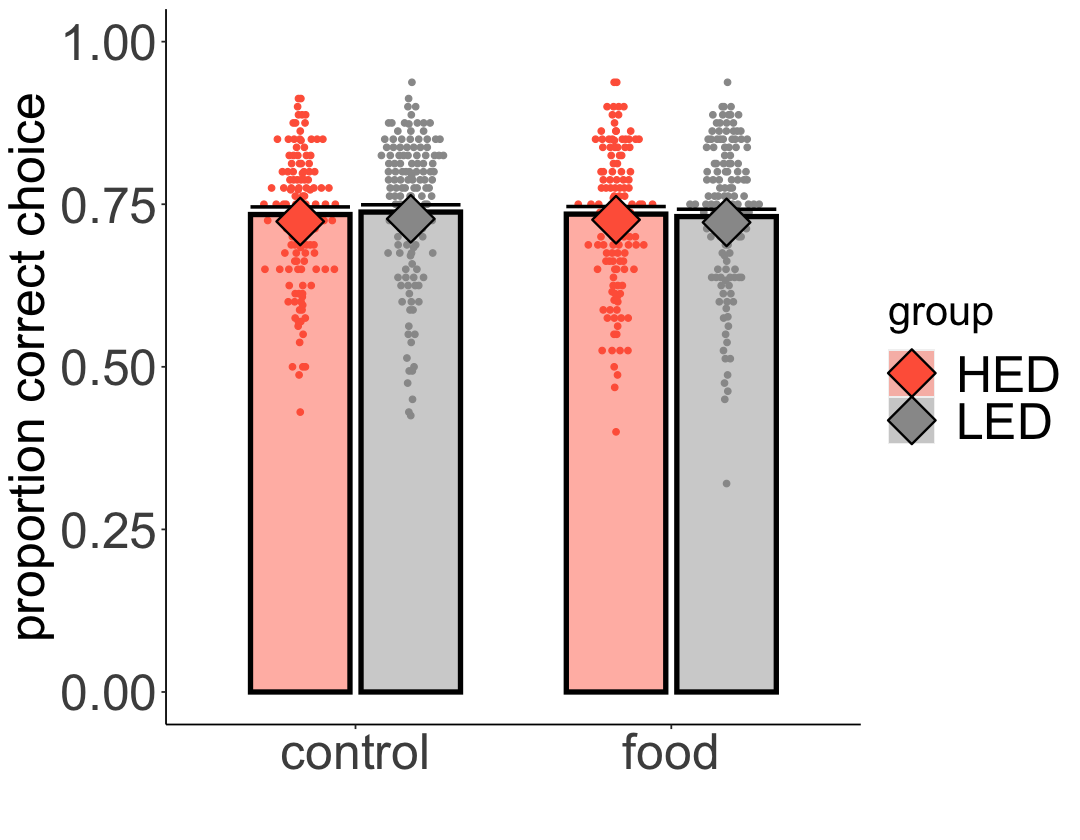

In [6]:
# correct choice by group and task 
options(repr.plot.width=9,repr.plot.height=7)

overall_sub<- summarySE(choice, measurevar="rewChoice", groupvars=c("blockType","group","participant"), na.rm=TRUE, conf.interval=.95)
overall<- summarySEwithin(choice, measurevar="rewChoice", withinvars=c("blockType"), betweenvars=c("group"), idvar='participant',na.rm=TRUE, conf.interval=.95)
modelSum<- summarySEwithin(model_preds, measurevar="predRewChoice", withinvars=c("blockType"),betweenvars="group",idvar="participant", na.rm=TRUE, conf.interval=.95)

ggplot(overall,aes(x=blockType,y=rewChoice,fill=group))+
  geom_quasirandom(bandwidth=0.001,data=overall_sub,mapping=aes(x=blockType,y=rewChoice,fill=group,color=group,group=group),dodge.width=0.7)+  
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+ci,width=0.7),linewidth=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2")+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  geom_point(data = modelSum, aes(x = blockType, y = predRewChoice), size = 10, shape = 23,color='black',position = position_dodge(width = 0.7),stroke=1)+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0,1))


Automatically converting the following non-factors to factors: group, trialNumber

Automatically converting the following non-factors to factors: group, trialNumber



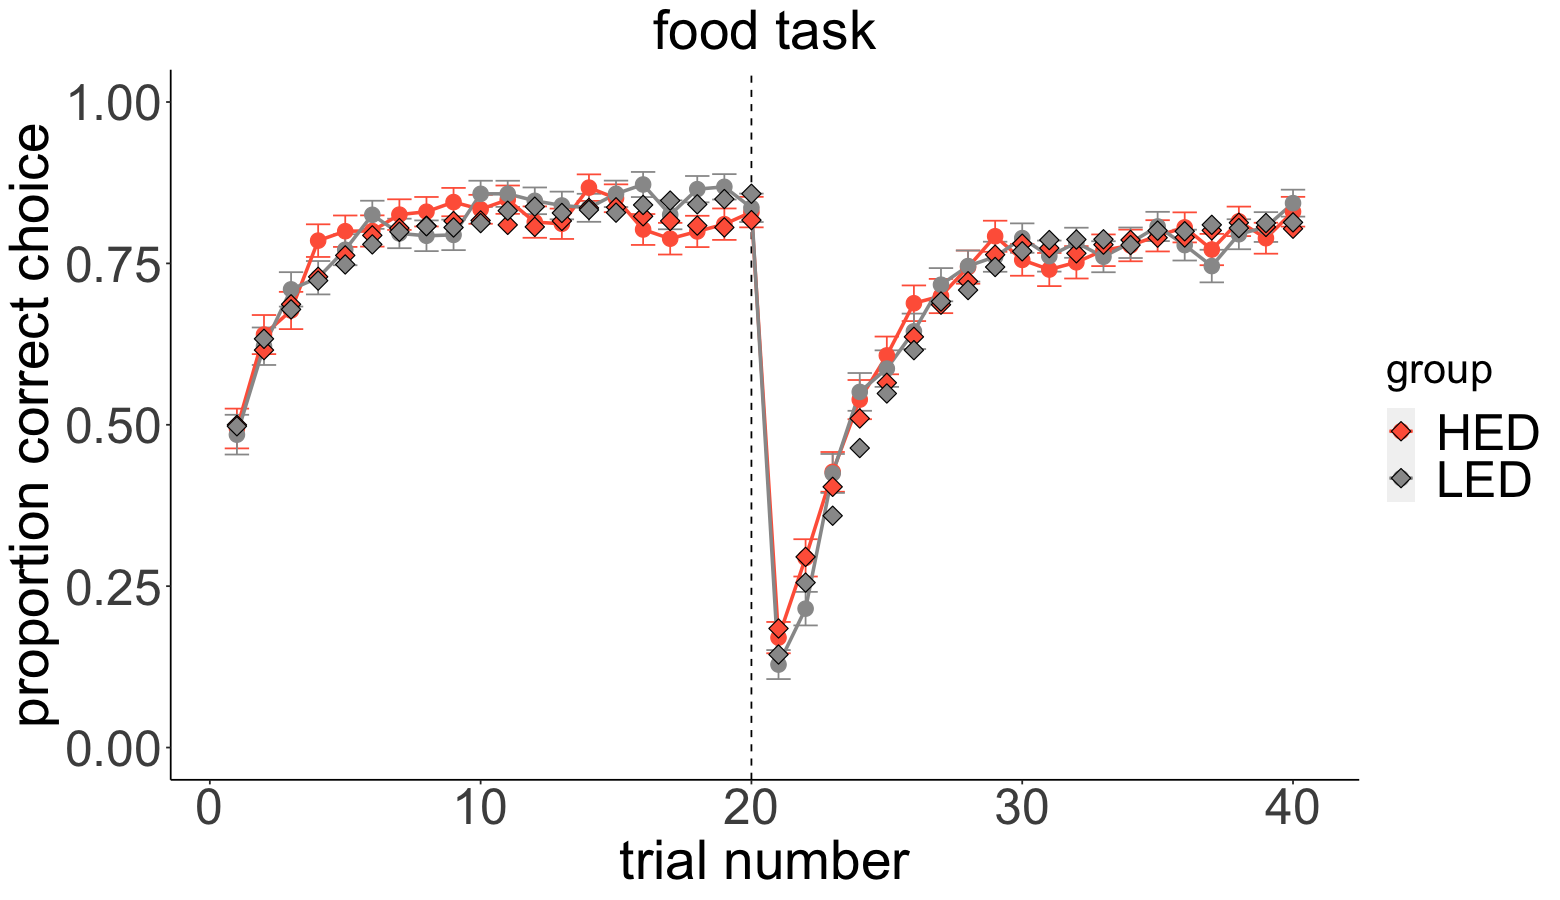

In [7]:
# food task: trial by trial performance (across blocks)
options(repr.plot.width=13,repr.plot.height=7.5)

foodSum<- summarySEwithin(foodChoice, measurevar="rewChoice", betweenvars=c("group"), withinvars="trialNumber",idvar="participant",na.rm=TRUE, conf.interval=.95)
modelSum<- summarySEwithin(foodModel, measurevar="predRewChoice", betweenvars=c("group"), withinvars="trialNumber",idvar="participant", na.rm=TRUE, conf.interval=.95)

foodSum$data<-'behavior'
modelSum$data<-'model'

ggplot(foodSum, aes(x = as.numeric(trialNumber), y = rewChoice, color = group, fill = group)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=33),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=33),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  geom_vline(xintercept = 20, linetype = "dashed", colour = "black") +
  ggtitle('food task')+
  geom_errorbar(aes(ymin=rewChoice-se, ymax=rewChoice+se))+
  scale_fill_manual(values = c("#FF6347", "#999999")) + scale_color_manual(values = c("#FF6347", "#999999")) + 
  geom_line(size = 1, alpha=1) + geom_point(size = 4) + coord_cartesian(ylim = c(0, 1)) +
  xlab('trial number') + ylab('proportion correct choice')+
  geom_point(data = modelSum, aes(x = as.numeric(trialNumber), y = predRewChoice), size = 4, shape = 23,color='black')


Automatically converting the following non-factors to factors: group, block

Automatically converting the following non-factors to factors: group, block



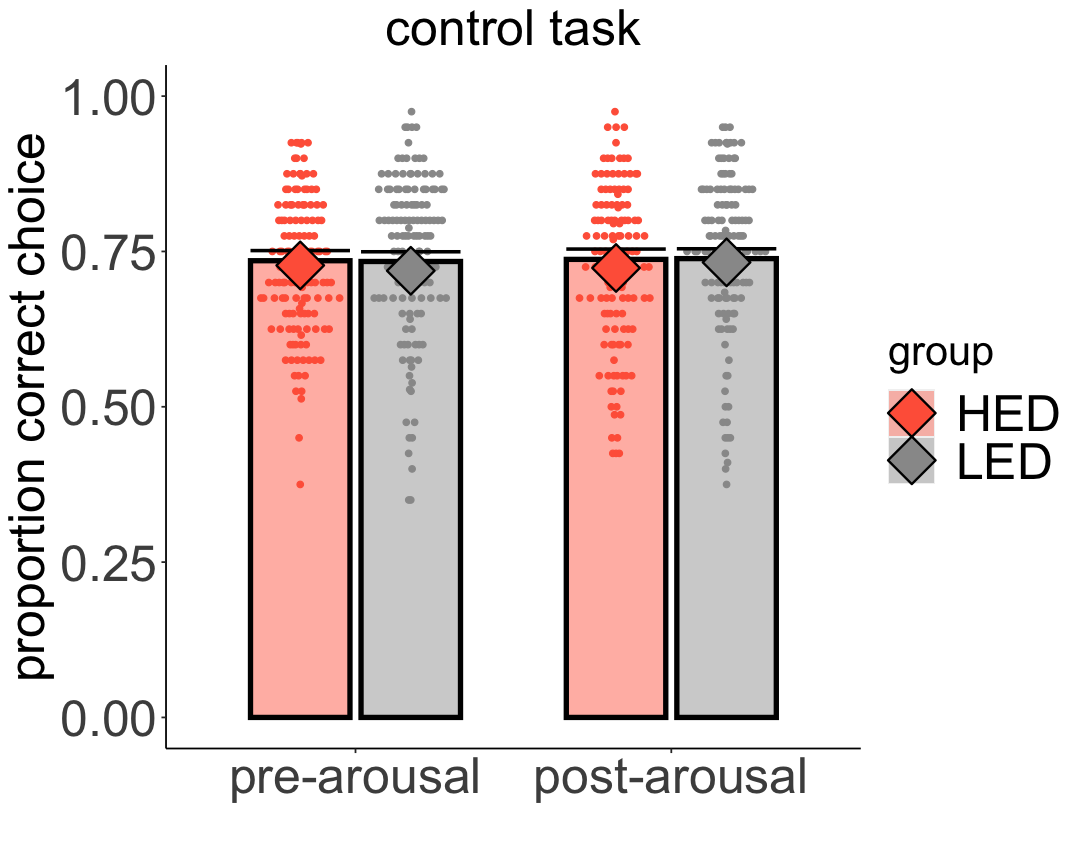

In [8]:
# control task 
options(repr.plot.width=9,repr.plot.height=7.2)

overall_sub<- summarySE(controlChoice, measurevar="rewChoice", groupvars=c("group","block","participant"), na.rm=TRUE, conf.interval=.95)
overall<- summarySEwithin(controlChoice, measurevar="rewChoice", withinvars=c("block"), betweenvars="group",idvar="participant",na.rm=TRUE, conf.interval=.95)
cmodel<- summarySEwithin(controlModel, measurevar="predRewChoice", withinvars=c("block"),betweenvars="group",idvar="participant", na.rm=TRUE, conf.interval=.95)

ggplot(overall,aes(x=as.factor(block),y=rewChoice,fill=group))+
  geom_quasirandom(bandwidth=0.001,data=overall_sub,mapping=aes(x=as.factor(block),y=rewChoice,fill=group,color=group,group=group),dodge.width=0.7)+  
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+ci,width=0.7),linewidth=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2")+
  geom_point(data = cmodel, aes(x = block, y = predRewChoice), size = 10, shape = 23,color='black',position = position_dodge(width = 0.7),stroke=1)+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0,1))+scale_x_discrete(labels = c("pre-arousal", 'post-arousal'))+ggtitle('control task')


Automatically converting the following non-factors to factors: group, trialNumber



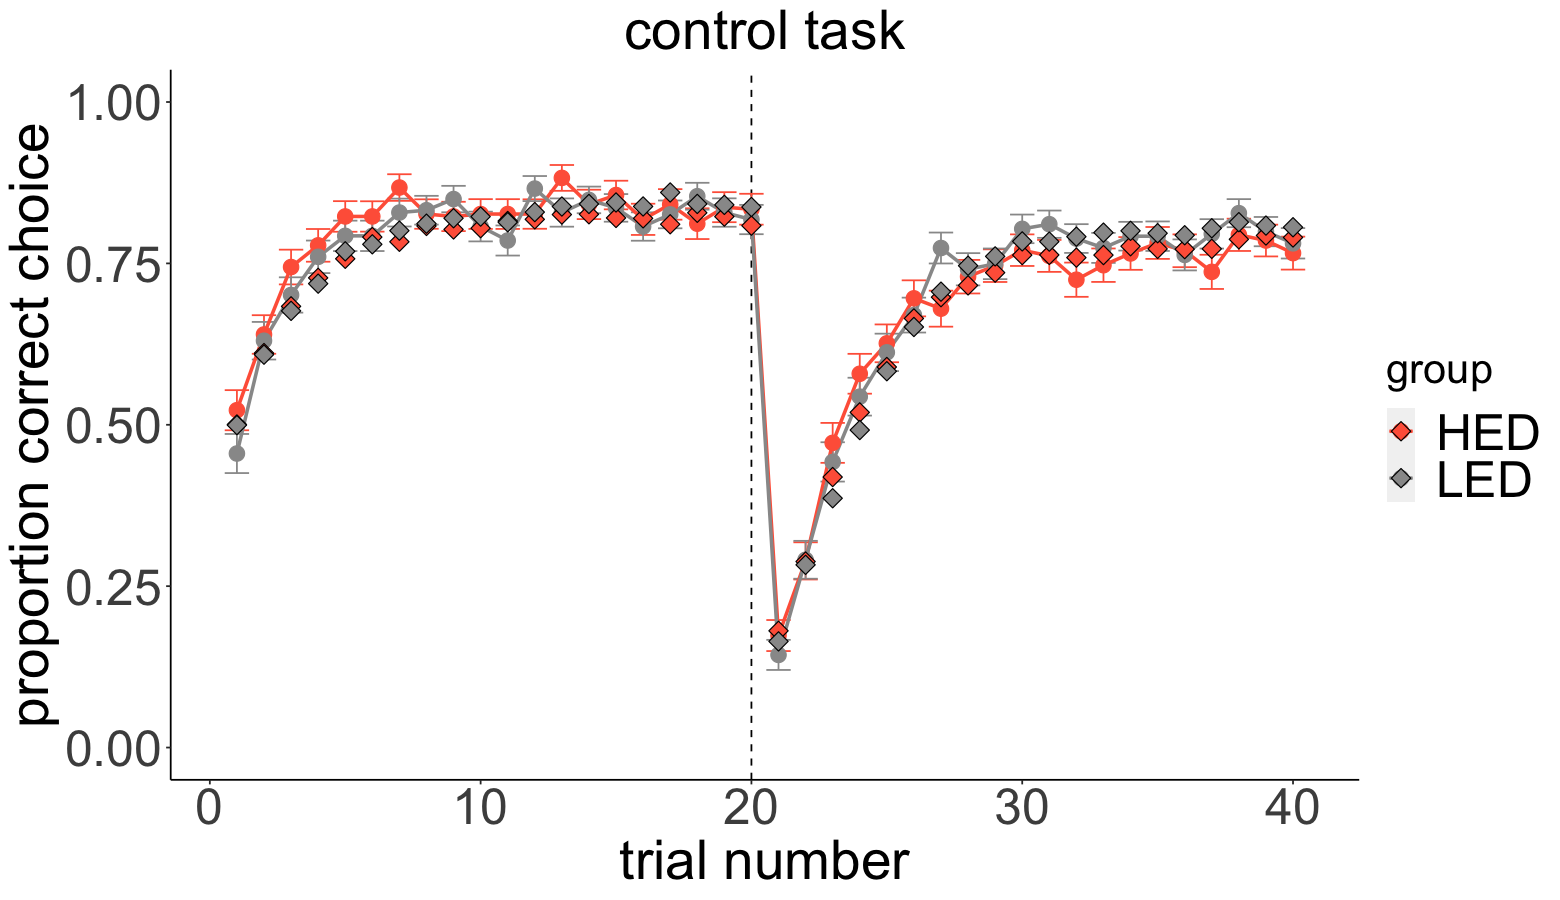

In [9]:
# control task: trial by trial performance (across blocks)
options(repr.plot.width=13,repr.plot.height=7.5)

contSum<- summarySEwithin(controlChoice, measurevar="rewChoice", betweenvars=c("group"), withinvars="trialNumber",idvar="participant",na.rm=TRUE, conf.interval=.95)
modelSum<- summarySE(controlModel, measurevar="predRewChoice", groupvars=c("group","trialNumber"), na.rm=TRUE, conf.interval=.95)

contSum$data<-'behavior'
modelSum$data<-'model'

ggplot(contSum, aes(x = as.numeric(trialNumber), y = rewChoice, color = group, fill = group)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=33),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=33),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  geom_vline(xintercept = 20, linetype = "dashed", colour = "black") +
  ggtitle('control task')+
  geom_errorbar(aes(ymin=rewChoice-se, ymax=rewChoice+se))+
  scale_fill_manual(values = c("#FF6347", "#999999")) + scale_color_manual(values = c("#FF6347", "#999999")) + 
  geom_line(size = 1, alpha=1) + geom_point(size = 4) + coord_cartesian(ylim = c(0, 1)) +
  xlab('trial number') + ylab('proportion correct choice')+
  geom_point(data = modelSum, aes(x = trialNumber, y = predRewChoice), size = 4, shape = 23,color='black')


In [10]:
# mixed-effects logistic regression predicting correct choice as a function of group
summary(glmer(rewChoice~group+scale(BMI)+(1|participant),family=binomial,data=choice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group + scale(BMI) + (1 | participant)
   Data: choice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 49183.5  49218.2 -24587.7  49175.5    43524 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8839 -1.0978  0.5139  0.6102  1.1752 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.2075   0.4555  
Number of obs: 43528, groups:  participant, 279

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.03610    0.04522  22.911   <2e-16 ***
groupLED     0.05713    0.06785   0.842    0.400    
scale(BMI)  -0.02796    0.03386  -0.826    0.409    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr) grpLED
groupLED   -0.757       
scale(BMI) -0.373  0.492

In [11]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group
summary(brm(rewChoice~group+scale(BMI)+(1|participant),data = choice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group + scale(BMI) + (1 | participant) 
   Data: choice (Number of observations: 43528) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.46      0.02     0.42     0.51 1.00     1083     1985

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.04      0.05     0.95     1.13 1.00      716     1519
groupLED      0.06      0.07    -0.08     0.19 1.00      529     1158
scaleBMI     -0.03      0.03    -0.10     0.04 1.01      708     1395

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [12]:
# mixed-effects logistic regression predicting correct choice as a function of group X blockType
summary(glmer(rewChoice~group*blockType+scale(BMI)+(blockType|participant),family=binomial,data=choice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * blockType + scale(BMI) + (blockType | participant)
   Data: choice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 49137.1  49206.6 -24560.6  49121.1    43520 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9916 -1.0731  0.5127  0.6097  1.2669 

Random effects:
 Groups      Name          Variance Std.Dev. Corr 
 participant (Intercept)   0.2213   0.4704        
             blockTypefood 0.1038   0.3222   -0.25
Number of obs: 43528, groups:  participant, 279

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             1.037714   0.048938  21.204   <2e-16 ***
groupLED                0.078440   0.072768   1.078    0.281    
blockTypefood           0.008088   0.042045   0.192    0.847    
scale(BMI)             -0.027523   0.033958  -0.

In [13]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X blockType
summary(brm(rewChoice~group*blockType+scale(BMI)+(blockType|participant),data = choice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * blockType + scale(BMI) + (blockType | participant) 
   Data: choice (Number of observations: 43528) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
                             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                    0.48      0.03     0.43     0.53 1.00     1892
sd(blockTypefood)                0.33      0.03     0.26     0.39 1.00     1309
cor(Intercept,blockTypefood)    -0.24      0.10    -0.42    -0.04 1.00     2713
                             Tail_ESS
sd(Intercept)                    2435
sd(blockTypefood)                2164
cor(Intercept,blockTypefood)     2997

Population-Level Effects: 
                       Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                  1.04      0.05     0.93     1.13 1.00     1392
groupLED     

In [14]:
# mixed-effects logistic regression predicting correct choice as a function of group in food task
summary(glmer(rewChoice~group+scale(BMI)+(1|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group + scale(BMI) + (1 | participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24675.9  24707.9 -12334.0  24667.9    21768 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8405 -1.1147  0.5080  0.6119  1.2320 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.2553   0.5052  
Number of obs: 21772, groups:  participant, 279

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.04884    0.05249  19.981   <2e-16 ***
groupLED     0.03370    0.07865   0.429    0.668    
scale(BMI)  -0.03106    0.03915  -0.793    0.428    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr) grpLED
groupLED   -0.756       
scale(BMI) -0.373  0.491

In [15]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group in food task
summary(brm(rewChoice~group+scale(BMI)+(1|participant),data = foodChoice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group + scale(BMI) + (1 | participant) 
   Data: foodChoice (Number of observations: 21772) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.51      0.03     0.46     0.57 1.00     1388     1886

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.05      0.05     0.95     1.15 1.00     1105     1984
groupLED      0.03      0.08    -0.12     0.19 1.00     1191     2070
scaleBMI     -0.03      0.04    -0.11     0.05 1.00     1388     2109

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [16]:
# mixed-effects logistic regression predicting correct choice as a function of group in control task
summary(glmer(rewChoice~group+scale(BMI)+(1|participant),family=binomial,data=controlChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group + scale(BMI) + (1 | participant)
   Data: controlChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24585.2  24617.2 -12288.6  24577.2    21752 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7996 -1.0938  0.5162  0.6085  1.0207 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.2249   0.4743  
Number of obs: 21756, groups:  participant, 279

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.03944    0.04994  20.815   <2e-16 ***
groupLED     0.07794    0.07490   1.041    0.298    
scale(BMI)  -0.02716    0.03725  -0.729    0.466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr) grpLED
groupLED   -0.756       
scale(BMI) -0.374  0.492

In [17]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group in control task
summary(brm(rewChoice~group+scale(BMI)+(1|participant),data = controlChoice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group + scale(BMI) + (1 | participant) 
   Data: controlChoice (Number of observations: 21756) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.48      0.03     0.43     0.54 1.00     1331     2374

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.04      0.05     0.94     1.14 1.00     1154     1866
groupLED      0.08      0.07    -0.06     0.22 1.00     1277     2218
scaleBMI     -0.03      0.04    -0.10     0.05 1.00     1425     2262

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

# Reward learning was guided by a low-calorie food bias in participants with high eating-disorder symptoms and a high-calorie food bias in participants with low eating-disorder symptoms

In [18]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category in food task
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24456.6  24520.5 -12220.3  24440.6    21764 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3000 -0.9838  0.4927  0.6168  1.5924 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.3378   0.5812        
             rewCatloCal 0.4906   0.7004   -0.48
Number of obs: 21772, groups:  participant, 279

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.98479    0.06224  15.823   <2e-16 ***
groupLED              0.14707    0.09188   1.601   0.1095    
rewCatloCal           0.18654    0.07565   2.466   0.0137 *  
scale(BMI)           -0.03040    0.03967  -0.766   0.4434    
groupL

In [19]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category in food task
summary(brm(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),data = foodChoice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant) 
   Data: foodChoice (Number of observations: 21772) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  0.59      0.04     0.52     0.67 1.00     1251
sd(rewCatloCal)                0.71      0.05     0.62     0.81 1.00      967
cor(Intercept,rewCatloCal)    -0.47      0.07    -0.60    -0.33 1.00     1188
                           Tail_ESS
sd(Intercept)                  2043
sd(rewCatloCal)                1878
cor(Intercept,rewCatloCal)     2182

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                0.99      0.06     0.86     1.11 1.00     1181
groupLED                 0.14      

In [20]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category in control task
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),family=binomial,data=controlChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant)
   Data: controlChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24403.3  24467.2 -12193.6  24387.3    21748 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1601 -1.0102  0.4894  0.6107  1.4422 

Random effects:
 Groups      Name          Variance Std.Dev. Corr 
 participant (Intercept)   0.3081   0.5551        
             rewCatoutdoor 0.4113   0.6414   -0.49
Number of obs: 21756, groups:  participant, 279

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)             0.94007    0.05989  15.697  < 2e-16 ***
groupLED                0.12840    0.08840   1.453 0.146348    
rewCatoutdoor           0.25627    0.07150   3.584 0.000338 ***
scale(BMI)             -0.02880    0.03797  -0.759 

In [21]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category in control task
summary(brm(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),data = controlChoice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant) 
   Data: controlChoice (Number of observations: 21756) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
                             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                    0.56      0.04     0.50     0.64 1.00     1177
sd(rewCatoutdoor)                0.65      0.05     0.56     0.75 1.01      740
cor(Intercept,rewCatoutdoor)    -0.48      0.07    -0.61    -0.33 1.00      976
                             Tail_ESS
sd(Intercept)                    1654
sd(rewCatoutdoor)                1606
cor(Intercept,rewCatoutdoor)     1938

Population-Level Effects: 
                       Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                  0.94      0.06     0.82     1.06 1.00     1016
groupLED    

# Heightened emotional state modulated group-specific food biases

Automatically converting the following non-factors to factors: group, rewCat

Automatically converting the following non-factors to factors: group, rewCat

Automatically converting the following non-factors to factors: group, rewCat

Automatically converting the following non-factors to factors: group, rewCat



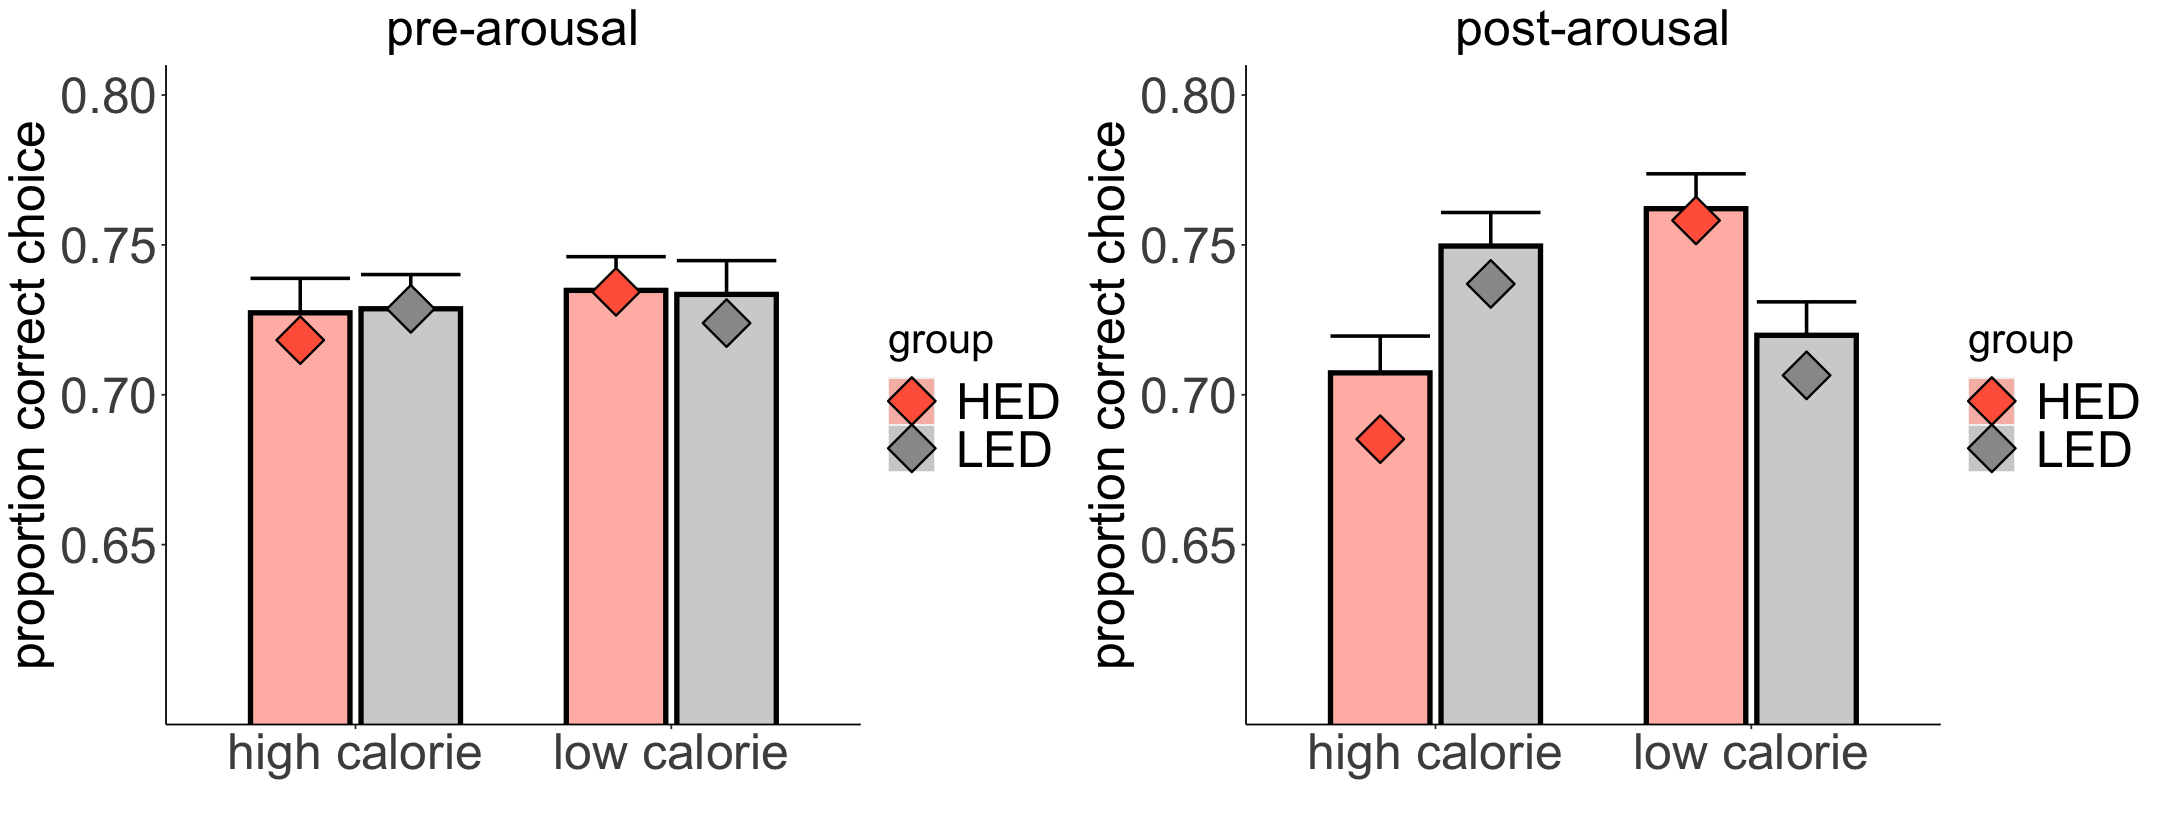

In [24]:
# correct choice by block, group and underlying reward category in food task
options(repr.plot.width=18,repr.plot.height=7)

b1<- summarySEwithin(block1, measurevar="rewChoice", withinvars=c("rewCat"), betweenvars= "group", idvar="participant", na.rm=TRUE, conf.interval=.95)
b2<- summarySEwithin(block2, measurevar="rewChoice", withinvars=c("rewCat"), betweenvars="group", idvar="participant", na.rm=TRUE, conf.interval=.95)

b1_m<- summarySEwithin(foodModel[foodModel$block==1,], measurevar="predRewChoice", withinvars=c("rewCat"), betweenvars= "group", idvar="participant", na.rm=TRUE, conf.interval=.95)
b2_m<- summarySEwithin(foodModel[foodModel$block==2,], measurevar="predRewChoice", withinvars=c("rewCat"), betweenvars= "group", idvar="participant", na.rm=TRUE, conf.interval=.95)
 
p1<-ggplot(b1,aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  geom_point(data = b1_m, aes(x = rewCat, y = predRewChoice), size = 10, shape = 23,color='black',position = position_dodge(width = 0.7),stroke=1)+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('pre-arousal')

p2<-ggplot(b2,aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  geom_point(data = b2_m, aes(x = rewCat, y = predRewChoice), size = 10, shape = 23,color='black',position = position_dodge(width = 0.7),stroke=1)+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('post-arousal')

grid.arrange(p1,p2,nrow=1,ncol=2)

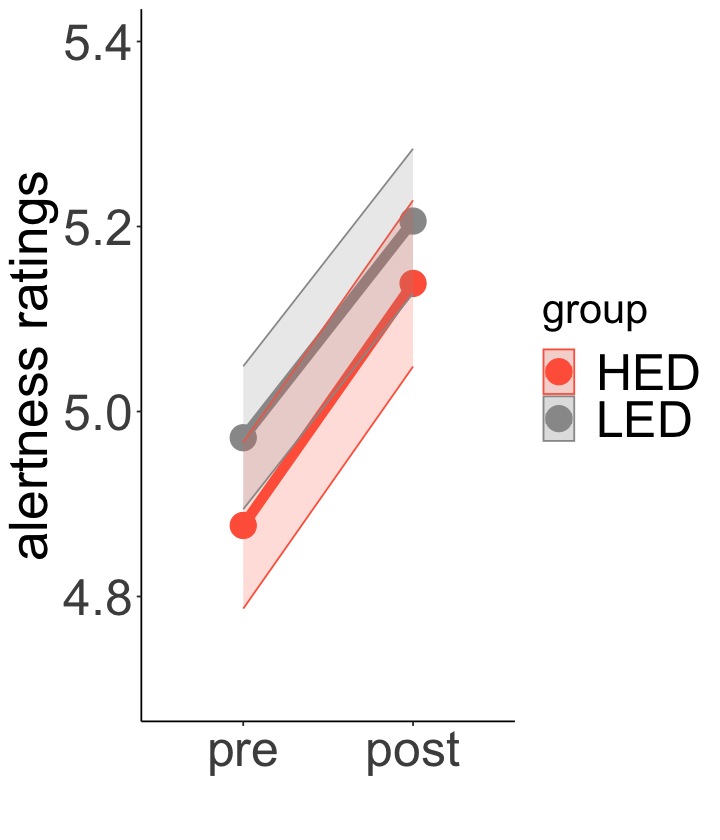

In [18]:
# alertness ratings pre- and post- wheel of fortune by group
arousal<-subset(ratings,trial=='arousal')
options(repr.plot.width=6,repr.plot.height=7)

arousal_means<-summarySE(arousal,measurevar="response",groupvars=c("group","phase"),na.rm=TRUE)
arousal_means2<-subset(arousal_means, phase=='pre_arousal'|phase=='post_arousal')
arousal_means2$phase<-factor(arousal_means2$phase, levels = c('pre_arousal','post_arousal'))

ggplot(arousal_means2,aes(x=phase,y=response,fill=group,color=group,group=group))+
  ylab("alertness ratings")+xlab("")+guides(group="none")+geom_point(size=7)+
  geom_line(size=3)+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+ 
  geom_ribbon(mapping=aes(ymin=response-se,ymax=response+se),alpha=0.2)+coord_cartesian(ylim=c(4.7,5.4))+
  xlab('')+theme(strip.text.x = element_text(size = 30), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=32),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  scale_x_discrete(labels = c("pre", 'post'))


In [26]:
# mixed-effects linear regression predicting alertness ratings as a function of pre- versus post-arousal block
arousalContrast<-subset(arousal, phase=='pre_arousal'|phase=='post_arousal')
arousalContrast$phase<-factor(arousalContrast$phase, levels = c('pre_arousal','post_arousal'))

summary(lmer(scale(response)~phase+scale(BMI)+(1|participant),data=arousalContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase + scale(BMI) + (1 | participant)
   Data: arousalContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 1452

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6805 -0.3498  0.1650  0.5945  3.3317 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5421   0.7363  
 Residual                0.4436   0.6660  
Number of obs: 545, groups:  participant, 279

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)        -0.12308    0.05944 417.79975  -2.071    0.039 *  
phasepost_arousal   0.26041    0.05745 269.07105   4.533 8.76e-06 ***
scale(BMI)         -0.07069    0.05280 273.36191  -1.339    0.182    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) phsps_
phaspst_rsl -0.466       
sca

In [27]:
# bayesian mixed-effects linear regression predicting alertness ratings as a function of pre- versus post-arousal block
summary(brm(scale(response)~1+phase+scale(BMI)+(1|participant), data = arousalContrast, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(response) ~ 1 + phase + scale(BMI) + (1 | participant) 
   Data: arousalContrast (Number of observations: 545) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.74      0.05     0.65     0.84 1.00     1155     2156

Population-Level Effects: 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            -0.12      0.06    -0.24    -0.01 1.00     2696     2874
phasepost_arousal     0.26      0.06     0.15     0.37 1.00     8530     2860
scaleBMI             -0.07      0.05    -0.17     0.03 1.00     2433     2933

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.67      0.03     0.61     0.73 1.00     1886    

In [28]:
# mixed-effects linear regression predicting alertness ratings as a function of group
summary(lmer(scale(response)~group+scale(BMI)+(1|participant),data=arousal,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ group + scale(BMI) + (1 | participant)
   Data: arousal
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 2656.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7619 -0.4057  0.0583  0.4277  3.2854 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5962   0.7722  
 Residual                0.4095   0.6399  
Number of obs: 1090, groups:  participant, 279

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)
(Intercept)  -0.03349    0.07699 275.45147  -0.435    0.664
groupLED      0.07671    0.11542 274.58947   0.665    0.507
scale(BMI)   -0.05186    0.05795 273.33007  -0.895    0.372

Correlation of Fixed Effects:
           (Intr) grpLED
groupLED   -0.758       
scale(BMI) -0.374  0.493

In [29]:
# bayesian mixed-effects linear regression predicting alertness ratings as a function of group
summary(brm(scale(response)~1+group+scale(BMI)+(1|participant), data = arousal, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(response) ~ 1 + group + scale(BMI) + (1 | participant) 
   Data: arousal (Number of observations: 1090) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.77      0.04     0.70     0.86 1.00     1015     1775

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.03      0.08    -0.18     0.12 1.01      831     1571
groupLED      0.07      0.12    -0.15     0.30 1.00      817     1321
scaleBMI     -0.06      0.06    -0.17     0.05 1.00      890     1456

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.64      0.02     0.61     0.67 1.00     3460     3330

Draws were sampled using samplin

In [30]:
# mixed-effects logistic regression predicting correct choice as a function of (pre- versus post-) arousal block in food task
summary(glmer(rewChoice~block+scale(BMI)+(block|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ block + scale(BMI) + (block | participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24562.8  24610.8 -12275.4  24550.8    21766 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0775 -1.0469  0.4935  0.6145  1.4237 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 1.0264   1.0131        
             block       0.3438   0.5864   -0.86
Number of obs: 21772, groups:  participant, 279

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.04919    0.07982  13.144   <2e-16 ***
block        0.02440    0.04860   0.502    0.616    
scale(BMI)  -0.04129    0.03478  -1.187    0.235    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr

In [31]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of (pre- versus post-) arousal block in food task
summary(brm(rewChoice~block+scale(BMI)+(block|participant),data = foodChoice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ block + scale(BMI) + (block | participant) 
   Data: foodChoice (Number of observations: 21772) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)            1.02      0.08     0.87     1.18 1.00     1919
sd(block)                0.59      0.05     0.50     0.69 1.00     1240
cor(Intercept,block)    -0.86      0.03    -0.90    -0.80 1.00     1835
                     Tail_ESS
sd(Intercept)            2634
sd(block)                1830
cor(Intercept,block)     2585

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.05      0.08     0.89     1.22 1.00     2567     2742
block         0.03      0.05    -0.08     0.12 1.00     2529     2839
scaleBMI     -0.04      0.0

In [32]:
# mixed-effects logistic regression predicting correct choice as a function of (pre- versus post-) arousal block in control task
summary(glmer(rewChoice~block+scale(BMI)+(block|participant),family=binomial,data=controlChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ block + scale(BMI) + (block | participant)
   Data: controlChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24516.3  24564.2 -12252.1  24504.3    21750 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9007 -1.0238  0.5051  0.6065  1.0735 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.7024   0.8381        
             block       0.2556   0.5055   -0.82
Number of obs: 21756, groups:  participant, 279

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.04732    0.07197  14.552   <2e-16 ***
block        0.03111    0.04512   0.689    0.491    
scale(BMI)  -0.03721    0.03336  -1.116    0.265    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (I

In [33]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of (pre- versus post-) arousal block in control task
summary(brm(rewChoice~block+scale(BMI)+(block|participant),data = controlChoice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ block + scale(BMI) + (block | participant) 
   Data: controlChoice (Number of observations: 21756) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)            0.84      0.07     0.70     0.99 1.00     1438
sd(block)                0.51      0.05     0.42     0.60 1.01      793
cor(Intercept,block)    -0.81      0.04    -0.87    -0.73 1.00     1164
                     Tail_ESS
sd(Intercept)            2327
sd(block)                1820
cor(Intercept,block)     2207

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.05      0.07     0.91     1.19 1.00     3129     3141
block         0.03      0.05    -0.06     0.12 1.00     2586     3235
scaleBMI     -0.04      

In [34]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block 
summary(glmer(rewChoice~group*rewCat*block+scale(BMI)+(rewCat+block|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * block + scale(BMI) + (rewCat + block |  
    participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24327.2  24447.0 -12148.6  24297.2    21757 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5372 -0.9014  0.4748  0.6023  1.6452 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.2140   1.1018              
             rewCatloCal 0.5135   0.7166   -0.35      
             block       0.3561   0.5968   -0.84  0.11
Number of obs: 21772, groups:  participant, 279

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 1.32812    0.14033   9.464  < 2e-16 ***
groupLED                   -0.49695    0.19863  -2.502 0.012351 *  
rewCatloCal      

In [35]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block 
summary(brm(rewChoice~group*rewCat*block+scale(BMI)+(rewCat+block|participant),data = foodChoice, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat * block + scale(BMI) + (rewCat + block | participant) 
   Data: foodChoice (Number of observations: 21772) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  1.11      0.08     0.96     1.27 1.00     2059
sd(rewCatloCal)                0.73      0.05     0.64     0.83 1.00     1713
sd(block)                      0.60      0.05     0.51     0.70 1.00     1391
cor(Intercept,rewCatloCal)    -0.34      0.09    -0.51    -0.17 1.00     1340
cor(Intercept,block)          -0.84      0.03    -0.89    -0.77 1.00     1890
cor(rewCatloCal,block)         0.10      0.10    -0.10     0.30 1.00     1221
                           Tail_ESS
sd(Intercept)                  2684
sd(rewCatloCal)              

In [37]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category in block 1
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),family=binomial,data=block1,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant)
   Data: block1
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 12262.1  12320.7  -6123.1  12246.1    11137 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0191 -0.7961  0.4517  0.5760  1.6602 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.6846   0.8274        
             rewCatloCal 1.6836   1.2975   -0.66
Number of obs: 11145, groups:  participant, 279

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.131386   0.088562  12.775   <2e-16 ***
groupLED             -0.027123   0.128949  -0.210    0.833    
rewCatloCal           0.098409   0.130261   0.755    0.450    
scale(BMI)           -0.005603   0.050424  -0.111    0.912    
group

In [38]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category in block 1
summary(brm(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),data = block1, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant) 
   Data: block1 (Number of observations: 11145) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 279) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  0.85      0.06     0.74     0.96 1.00     1184
sd(rewCatloCal)                1.33      0.08     1.17     1.50 1.00      852
cor(Intercept,rewCatloCal)    -0.65      0.05    -0.74    -0.55 1.00      982
                           Tail_ESS
sd(Intercept)                  1762
sd(rewCatloCal)                1966
cor(Intercept,rewCatloCal)     1797

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                1.14      0.09     0.97     1.32 1.00     1252
groupLED                -0.03      0.13

In [39]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category in block 2
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),family=binomial,data=block2,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant)
   Data: block2
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11588.9  11647.1  -5786.5  11572.9    10619 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0727 -0.7583  0.4317  0.5794  1.8483 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.6634   0.8145        
             rewCatloCal 1.6508   1.2848   -0.64
Number of obs: 10627, groups:  participant, 266

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.96091    0.08964  10.720  < 2e-16 ***
groupLED              0.33889    0.13106   2.586  0.00971 ** 
rewCatloCal           0.36234    0.13309   2.722  0.00648 ** 
scale(BMI)           -0.05933    0.05147  -1.153  0.24910    
groupLED:r

In [40]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category in block 2
summary(brm(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),data = block2, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant) 
   Data: block2 (Number of observations: 10627) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 266) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  0.83      0.06     0.73     0.96 1.00     1310
sd(rewCatloCal)                1.31      0.08     1.15     1.48 1.00      988
cor(Intercept,rewCatloCal)    -0.63      0.05    -0.73    -0.52 1.00     1157
                           Tail_ESS
sd(Intercept)                  2282
sd(rewCatloCal)                1833
cor(Intercept,rewCatloCal)     2132

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                0.96      0.09     0.79     1.15 1.00     1099
groupLED                 0.34      0.14

In [41]:
# change in happiness ratings after wheel of fortune
valence<-subset(ratings,trial=='happiness')

valContrast<-subset(valence, phase=='pre_arousal'|phase=='post_arousal')
posContrast<-subset(valContrast, wof_valence==1)
negContrast<-subset(valContrast, wof_valence==0)

negContrast$phase<-factor(negContrast$phase, levels = c('pre_arousal','post_arousal'))
posContrast$phase<-factor(posContrast$phase, levels = c('pre_arousal','post_arousal'))

# mixed-effects linear regression predicting happiness ratings as a function of pre- versus post-arousal block after a win
summary(mod<-lmer(scale(response)~phase+scale(BMI)+(1|participant),data=posContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase + scale(BMI) + (1 | participant)
   Data: posContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 574.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.84329 -0.52564  0.03777  0.43457  2.12228 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.4702   0.6857  
 Residual                0.3297   0.5742  
Number of obs: 236, groups:  participant, 118

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        -0.456021   0.082335 172.520690  -5.539 1.12e-07 ***
phasepost_arousal   0.912042   0.074759 117.000000  12.200  < 2e-16 ***
scale(BMI)          0.005874   0.073517 116.000000   0.080    0.936    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) phsps_
phaspst_rsl -0

In [42]:
# bayesian mixed-effects linear regression predicting happiness ratings as a function of pre- versus post-arousal block after a win
summary(brm(scale(response)~1+phase+scale(BMI)+(1|participant), data = posContrast, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(response) ~ 1 + phase + scale(BMI) + (1 | participant) 
   Data: posContrast (Number of observations: 236) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 118) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.69      0.06     0.57     0.82 1.01     1289     2294

Population-Level Effects: 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            -0.46      0.08    -0.62    -0.30 1.00     2725     3206
phasepost_arousal     0.91      0.08     0.76     1.06 1.00     8999     2697
scaleBMI              0.01      0.07    -0.14     0.15 1.00     2495     2519

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.58      0.04     0.51     0.67 1.00     1727     333

In [43]:
# mixed-effects linear regression predicting happiness ratings as a function of pre- versus post-arousal block after a loss
summary(mod<-lmer(scale(response)~phase+scale(BMI)+(1|participant),data=negContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase + scale(BMI) + (1 | participant)
   Data: negContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 706.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.76348 -0.55839 -0.08091  0.58050  2.61469 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.1291   0.3592  
 Residual                0.5036   0.7097  
Number of obs: 296, groups:  participant, 148

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)         0.60736    0.06538 280.91731   9.289   <2e-16 ***
phasepost_arousal  -1.21472    0.08250 147.00000 -14.725   <2e-16 ***
scale(BMI)         -0.04380    0.05081 146.00000  -0.862     0.39    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) phsps_
phaspst_rsl -0.631    

In [44]:
# bayesian mixed-effects linear regression predicting happiness ratings as a function of pre- versus post-arousal block after a loss
summary(brm(scale(response)~1+phase+scale(BMI)+(1|participant), data = negContrast, iter=10000,init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(response) ~ 1 + phase + scale(BMI) + (1 | participant) 
   Data: negContrast (Number of observations: 296) 
  Draws: 4 chains, each with iter = 10000; warmup = 5000; thin = 1;
         total post-warmup draws = 20000

Group-Level Effects: 
~participant (Number of levels: 148) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.33      0.09     0.11     0.49 1.00     2907     3457

Population-Level Effects: 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept             0.61      0.07     0.48     0.74 1.00    18093    14858
phasepost_arousal    -1.22      0.08    -1.38    -1.05 1.00    26716    14464
scaleBMI             -0.04      0.05    -0.14     0.06 1.00    17119    15178

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.72      0.04     0.64     0.81 1.00     4427     7

In [45]:
# mixed-effects linear regression predicting happiness ratings as a function of group X arousal block 
summary(mod<-lmer(scale(response)~group*phase+scale(BMI)+(1|participant),data=valContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ group * phase + scale(BMI) + (1 | participant)
   Data: valContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 1534.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.42276 -0.61149 -0.00381  0.66249  1.91267 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.1154   0.3396  
 Residual                0.8487   0.9212  
Number of obs: 545, groups:  participant, 279

Fixed effects:
                           Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)                -0.27696    0.08991 524.15248  -3.080  0.00218 **
groupLED                    0.18405    0.13065 511.34092   1.409  0.15952   
phasepre_arousal            0.31788    0.11280 277.22919   2.818  0.00518 **
scale(BMI)                  0.03978    0.05118 273.52396   0.777  0.43767   
groupLED:phasepre_arousal   0.08

In [46]:
# bayesian mixed-effects linear regression predicting happiness ratings as a function of group X arousal block 
summary(brm(scale(response)~1+group*phase+scale(BMI)+(1|participant), data = valContrast, iter = 10000, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(response) ~ 1 + group * phase + scale(BMI) + (1 | participant) 
   Data: valContrast (Number of observations: 545) 
  Draws: 4 chains, each with iter = 10000; warmup = 5000; thin = 1;
         total post-warmup draws = 20000

Group-Level Effects: 
~participant (Number of levels: 279) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.30      0.11     0.04     0.48 1.00     2341     2921

Population-Level Effects: 
                          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                    -0.28      0.09    -0.45    -0.10 1.00    16125
groupLED                      0.18      0.13    -0.07     0.44 1.00    14478
phasepre_arousal              0.32      0.11     0.10     0.54 1.00    16346
scaleBMI                      0.04      0.05    -0.06     0.14 1.00    18302
groupLED:phasepre_arousal     0.08      0.16    -0.23     0.39 1.00    15067


# Interoceptive awareness predicted initial food biases and their change across the emotional arousal manipulation

In [47]:
arousC_1<- summarySEwithin(foodChoice[foodChoice$block==1,], measurevar="rewChoice", withinvars=c("rewCat"), betweenvars=c("group","MAIA_group"),idvar="participant", na.rm=TRUE, conf.interval=.95)
arousC_1<-arousC_1[!is.na(arousC_1$MAIA_group),]

arousC_2<- summarySEwithin(foodChoice[foodChoice$block==2,], measurevar="rewChoice", withinvars=c("rewCat"), betweenvars=c("group","MAIA_group"),idvar="participant", na.rm=TRUE, conf.interval=.95)
arousC_2<-arousC_2[!is.na(arousC_2$MAIA_group),]

Automatically converting the following non-factors to factors: group, MAIA_group, rewCat

Automatically converting the following non-factors to factors: group, MAIA_group, rewCat



Automatically converting the following non-factors to factors: group, MAIA_group, rewCat

Automatically converting the following non-factors to factors: group, MAIA_group, rewCat



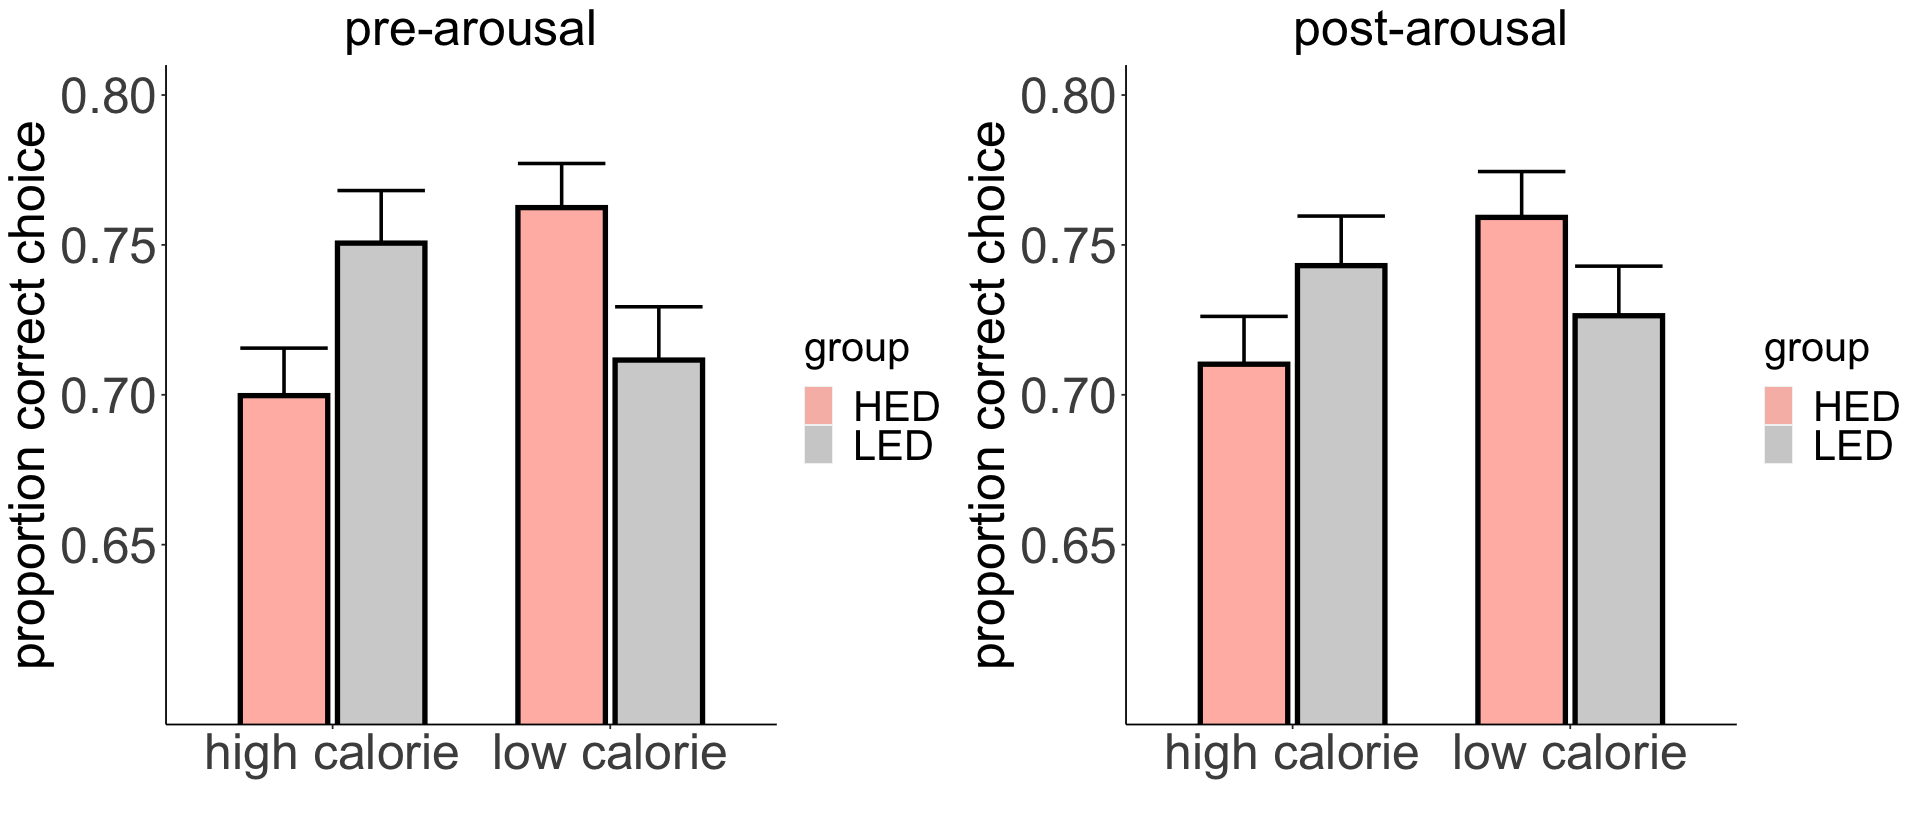

In [48]:
# correct choice by block, group and underlying reward category in participants as a function of individual interoceptive awarenes
interoA_b1<- summarySEwithin(block1, measurevar="rewChoice", withinvars=c("rewCat"), betweenvars=c("group","MAIA_group"),idvar="participant", na.rm=TRUE, conf.interval=.95)
interoA_b1<-interoA_b1[!is.na(interoA_b1$MAIA_group),]

interoA_b2<- summarySEwithin(block2, measurevar="rewChoice", withinvars=c("rewCat"), betweenvars=c("group","MAIA_group"),idvar="participant", na.rm=TRUE, conf.interval=.95)
interoA_b2<-interoA_b2[!is.na(interoA_b2$MAIA_group),]

options(repr.plot.width=16,repr.plot.height=7)

# lower interoceptive awareness
p1<-ggplot(interoA_b1[interoA_b1$MAIA_group=="low",],aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('pre-arousal')

p2<-ggplot(interoA_b2[interoA_b2$MAIA_group=="low",],aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('post-arousal')

grid.arrange(p1,p2,nrow=1,ncol=2)

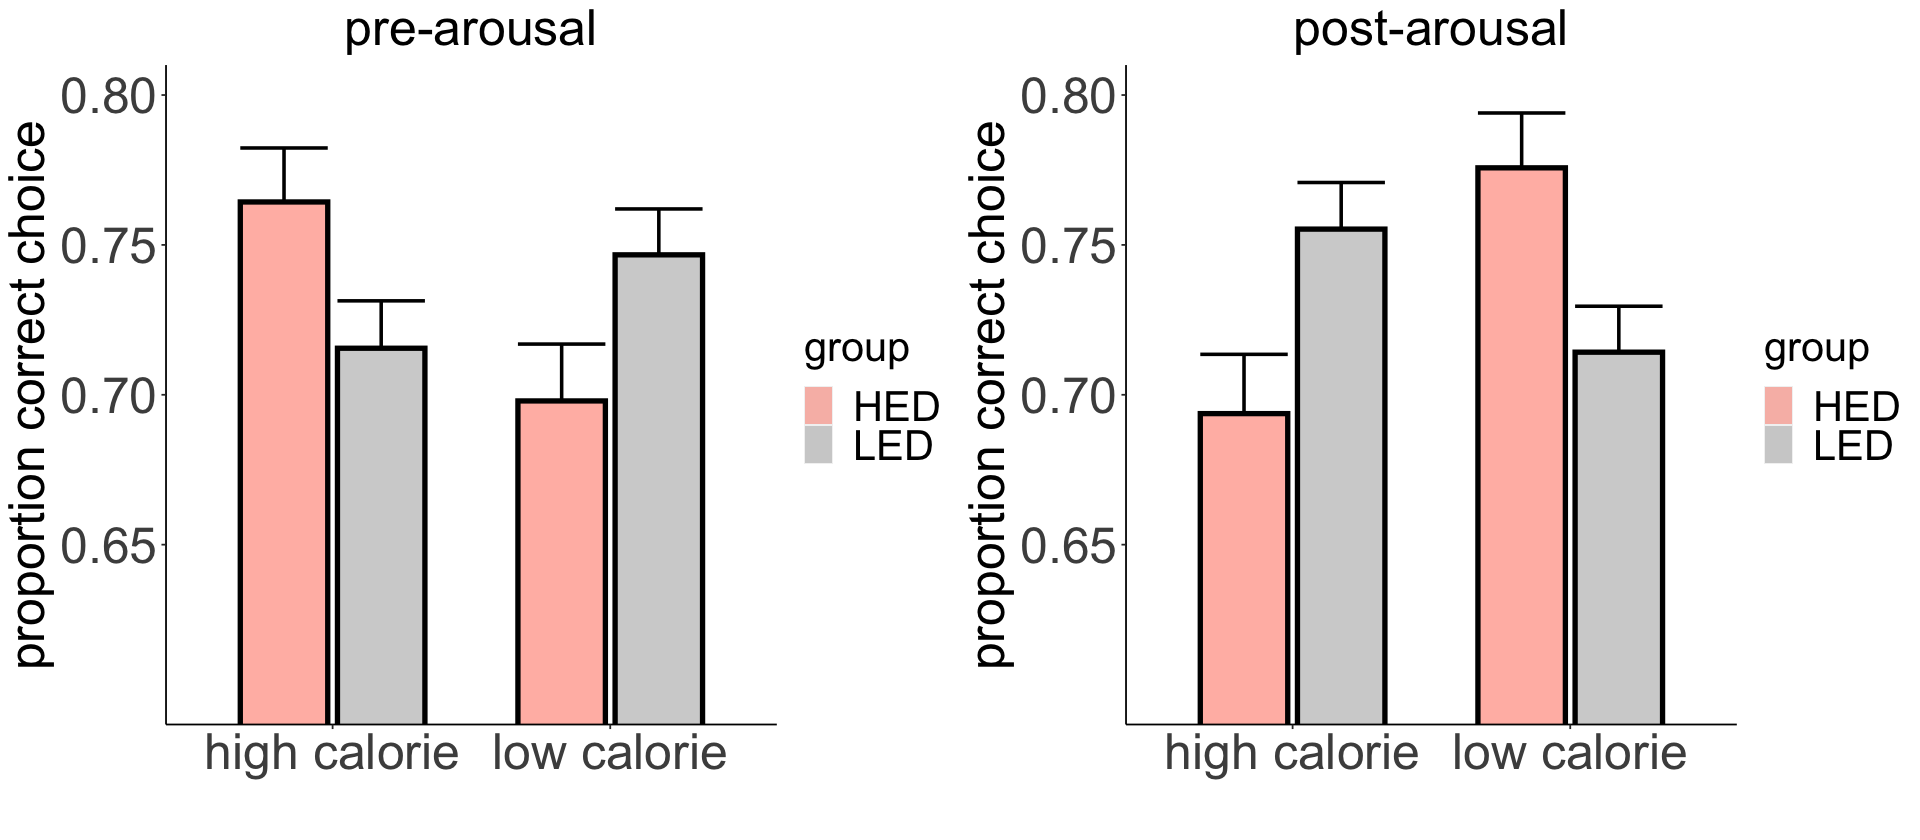

In [49]:
# higher interoceptive awareness
options(repr.plot.width=16,repr.plot.height=7)

p1<-ggplot(interoA_b1[interoA_b1$MAIA_group=="high",],aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('pre-arousal')

p2<-ggplot(interoA_b2[interoA_b2$MAIA_group=="high",],aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('post-arousal')

grid.arrange(p1,p2,nrow=1,ncol=2)

Warning message in qt(conf.interval/2 + 0.5, datac$N - 1):
“NaNs produced”


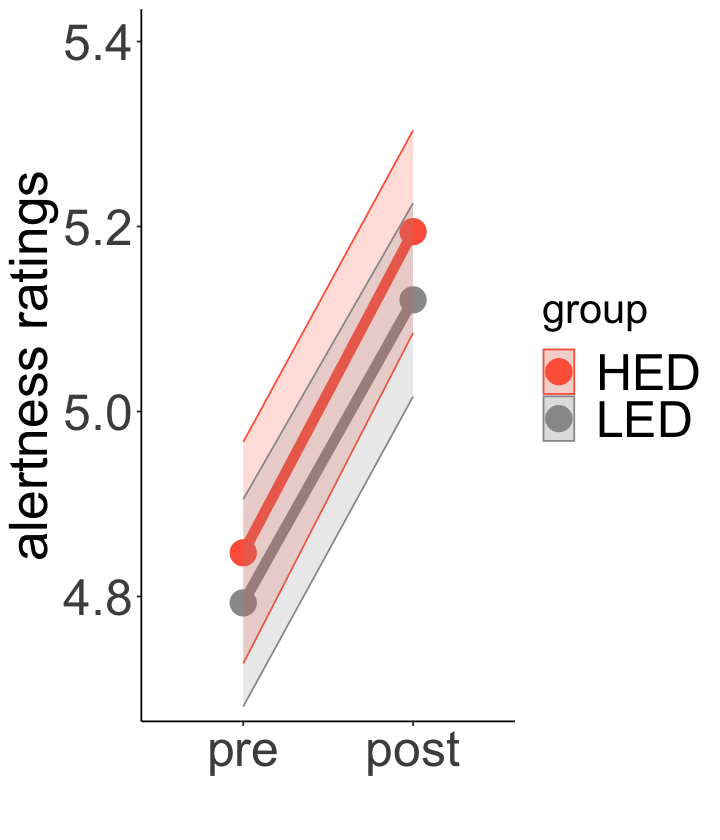

In [19]:
# alertness ratings pre- and post- wheel of fortune by group in participants with lower interoceptive awareness
options(repr.plot.width=6,repr.plot.height=7)

arousal_means<-summarySE(arousal[arousal$MAIA_group=="low",],measurevar="response",groupvars=c("group","phase"),na.rm=TRUE)
arousal_means2<-subset(arousal_means, phase=='pre_arousal'|phase=='post_arousal')
arousal_means2$phase<-factor(arousal_means2$phase, levels = c('pre_arousal','post_arousal'))

ggplot(arousal_means2,aes(x=phase,y=response,fill=group,color=group,group=group))+
  ylab("alertness ratings")+xlab("")+guides(group="none")+geom_point(size=7)+
  geom_line(size=3)+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+ 
  geom_ribbon(mapping=aes(ymin=response-se,ymax=response+se),alpha=0.2)+coord_cartesian(ylim=c(4.7,5.4))+
  xlab('')+theme(strip.text.x = element_text(size = 30), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=32),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  scale_x_discrete(labels = c("pre", 'post'))


Warning message in qt(conf.interval/2 + 0.5, datac$N - 1):
“NaNs produced”


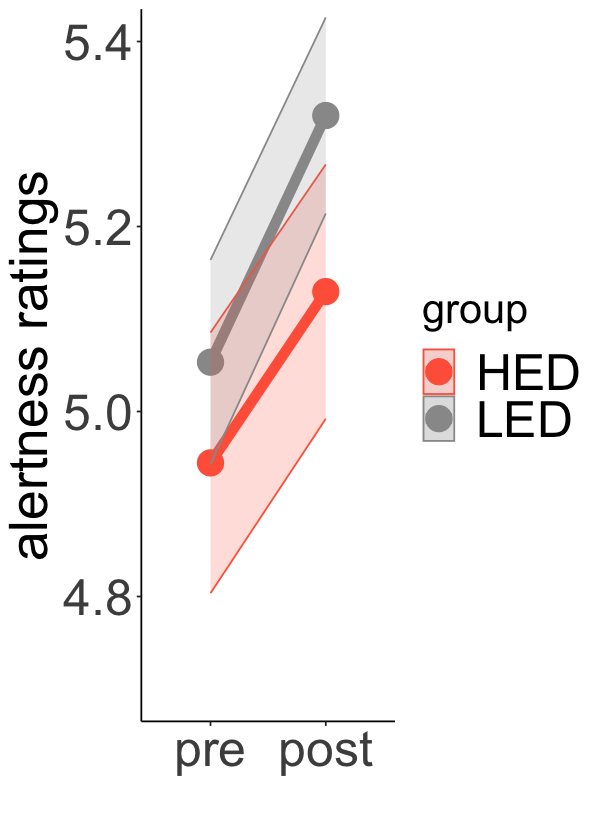

In [20]:
# alertness ratings pre- and post- wheel of fortune by group in participants with higher interoceptive awareness
options(repr.plot.width=5,repr.plot.height=7)

arousal_means<-summarySE(arousal[arousal$MAIA_group=="high",],measurevar="response",groupvars=c("group","phase"),na.rm=TRUE)
arousal_means2<-subset(arousal_means, phase=='pre_arousal'|phase=='post_arousal')
arousal_means2$phase<-factor(arousal_means2$phase, levels = c('pre_arousal','post_arousal'))

ggplot(arousal_means2,aes(x=phase,y=response,fill=group,color=group,group=group))+
  ylab("alertness ratings")+xlab("")+guides(group="none")+geom_point(size=7)+
  geom_line(size=3)+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+ 
  geom_ribbon(mapping=aes(ymin=response-se,ymax=response+se),alpha=0.2)+coord_cartesian(ylim=c(4.7,5.4))+
  xlab('')+theme(strip.text.x = element_text(size = 30), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=32),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  scale_x_discrete(labels = c("pre", 'post'))


In [53]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block X interoceptive awareness in food task
summary(glmer(rewChoice~group*rewCat*block*scale(MAIA_sum)+scale(BMI)+(block+rewCat|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))


Correlation matrix not shown by default, as p = 17 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * block * scale(MAIA_sum) + scale(BMI) +  
    (block + rewCat | participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 23028.0  23210.6 -11491.0  22982.0    20672 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5119 -0.8664  0.4727  0.6030  1.8115 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.2546   1.1201              
             block       0.3524   0.5936   -0.86      
             rewCatloCal 0.4990   0.7064   -0.36  0.11
Number of obs: 20695, groups:  participant, 259

Fixed effects:
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                                 1.40861    0.15043   9.364  < 2e-16
groupLED                                   

In [54]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block X interoceptive awareness in food task
summary(brm(rewChoice~group*rewCat*block*scale(MAIA_sum)+scale(BMI)+(block+rewCat|participant),data = foodChoice, family=bernoulli, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat * block * scale(MAIA_sum) + scale(BMI) + (block + rewCat | participant) 
   Data: foodChoice (Number of observations: 20695) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 259) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  1.14      0.08     0.98     1.32 1.00     1186
sd(block)                      0.61      0.05     0.51     0.71 1.00      950
sd(rewCatloCal)                0.73      0.05     0.63     0.84 1.01      901
cor(Intercept,block)          -0.85      0.03    -0.90    -0.78 1.00     1404
cor(Intercept,rewCatloCal)    -0.35      0.09    -0.52    -0.17 1.00      830
cor(block,rewCatloCal)         0.10      0.11    -0.11     0.32 1.00      807
                           Tail_ESS
sd(Intercept)                  1814
sd(block)  

In [28]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block X interoceptive awareness in control task
summary(glmer(rewChoice~group*rewCat*block*scale(MAIA_sum)+scale(BMI)+(block+rewCat|participant),family=binomial,data=controlChoice,glmerControl(optimizer="bobyqa")))


Correlation matrix not shown by default, as p = 17 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * block * scale(MAIA_sum) + scale(BMI) +  
    (block + rewCat | participant)
   Data: controlChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 23019.1  23201.6 -11486.5  22973.1    20658 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2701 -0.9311  0.4790  0.6038  1.4853 

Random effects:
 Groups      Name          Variance Std.Dev. Corr       
 participant (Intercept)   0.7704   0.8777              
             block         0.2601   0.5100   -0.78      
             rewCatoutdoor 0.4240   0.6511   -0.28 -0.05
Number of obs: 20681, groups:  participant, 259

Fixed effects:
                                              Estimate Std. Error z value
(Intercept)                                   0.980779   0.133350   7.355
groupLED                                    

In [29]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block X interoceptive awareness in food task
summary(brm(rewChoice~group*rewCat*block*scale(MAIA_sum)+scale(BMI)+(block+rewCat|participant),data = controlChoice, family=bernoulli, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat * block * scale(MAIA_sum) + scale(BMI) + (block + rewCat | participant) 
   Data: controlChoice (Number of observations: 20681) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 259) 
                             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                    0.89      0.08     0.72     1.06 1.00     1087
sd(block)                        0.52      0.05     0.42     0.62 1.01      515
sd(rewCatoutdoor)                0.67      0.05     0.58     0.77 1.00      998
cor(Intercept,block)            -0.76      0.05    -0.84    -0.65 1.01      911
cor(Intercept,rewCatoutdoor)    -0.28      0.11    -0.48    -0.05 1.01      601
cor(block,rewCatoutdoor)        -0.06      0.12    -0.29     0.18 1.01      593
                             Tail_ESS
sd(Intercept)               

In [55]:
# mixed-effects linear regression predicting alertness ratings as a function of interoceptive awareness
summary(mod<-lmer(scale(response)~scale(MAIA_sum)+scale(BMI)+(1|participant),data=arousal,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ scale(MAIA_sum) + scale(BMI) + (1 | participant)
   Data: arousal
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 2471.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9341 -0.4272  0.0857  0.4220  3.3020 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5329   0.73    
 Residual                0.3970   0.63    
Number of obs: 1036, groups:  participant, 259

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)       0.00392    0.04941 256.00000   0.079  0.93682   
scale(MAIA_sum)   0.15316    0.04954 256.00000   3.091  0.00221 **
scale(BMI)       -0.07593    0.05055 256.00000  -1.502  0.13431   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) s(MAIA
scl(MAIA_s) 0.001        
scale(BMI)

In [56]:
# bayesian mixed-effects linear regression predicting alertness ratings as a function of interoceptive awareness
summary(brm(scale(response)~1+scale(MAIA_sum)+scale(BMI)+(1|participant), data = arousal, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(response) ~ 1 + scale(MAIA_sum) + scale(BMI) + (1 | participant) 
   Data: arousal (Number of observations: 1036) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 259) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.75      0.04     0.68     0.83 1.00     1160     2059

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        -0.00      0.05    -0.10     0.10 1.00      851     1223
scaleMAIA_sum     0.16      0.05     0.05     0.25 1.01     1028     1895
scaleBMI         -0.08      0.05    -0.18     0.02 1.00      985     1258

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.65      0.02     0.61     0.68 1.00     3828     3107

Draws 

In [57]:
# mixed-effects linear regression predicting alertness ratings as a function of group X interoceptive awareness
summary(mod<-lmer(scale(response)~group*scale(MAIA_sum)+scale(BMI)+(1|participant),data=arousal,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ group * scale(MAIA_sum) + scale(BMI) + (1 |  
    participant)
   Data: arousal
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 2474.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9705 -0.4510  0.0764  0.4309  3.2498 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5316   0.7291  
 Residual                0.3970   0.6300  
Number of obs: 1036, groups:  participant, 259

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)
(Intercept)               -0.002875   0.078271 254.000001  -0.037    0.971
groupLED                  -0.016652   0.116680 254.000001  -0.143    0.887
scale(MAIA_sum)            0.063965   0.076854 254.000000   0.832    0.406
scale(BMI)                -0.078264   0.058555 254.000000  -1.337    0.183
groupLED:scale(MAIA_sum)   0.159844   0

In [58]:
# bayesian mixed-effects linear regression predicting alertness ratings as a function of group X interoceptive awareness
summary(brm(scale(response)~1+group*scale(MAIA_sum)+scale(BMI)+(1|participant), data = arousal, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(response) ~ 1 + group * scale(MAIA_sum) + scale(BMI) + (1 | participant) 
   Data: arousal (Number of observations: 1036) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 259) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.75      0.04     0.68     0.84 1.01     1035     1548

Population-Level Effects: 
                       Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                 -0.00      0.08    -0.16     0.15 1.00      884
groupLED                  -0.02      0.12    -0.25     0.21 1.00      885
scaleMAIA_sum              0.07      0.08    -0.09     0.22 1.00      949
scaleBMI                  -0.08      0.06    -0.20     0.04 1.00     1112
groupLED:scaleMAIA_sum     0.16      0.11    -0.04     0.37 1.00      876
             

In [59]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category X interoceptive awareness in food task block 1
summary(glmer(rewChoice~group*rewCat*scale(MAIA_sum)+scale(BMI)+(rewCat|participant),family=binomial,data=block1,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * scale(MAIA_sum) + scale(BMI) + (rewCat |  
    participant)
   Data: block1
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11327.1  11414.1  -5651.6  11303.1    10335 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0955 -0.7266  0.4480  0.5763  1.6615 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.6997   0.8365        
             rewCatloCal 1.6830   1.2973   -0.67
Number of obs: 10347, groups:  participant, 259

Fixed effects:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.158299   0.096099  12.053  < 2e-16 ***
groupLED                             -0.001596   0.138914  -0.011  0.99083    
rewCatloCal                           0.032663   0.139254  

In [60]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category X interoceptive awareness in food task block 1
summary(brm(rewChoice~group*rewCat*scale(MAIA_sum)+scale(BMI)+(rewCat|participant),data = block1, family=bernoulli, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat * scale(MAIA_sum) + scale(BMI) + (rewCat | participant) 
   Data: block1 (Number of observations: 10347) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 259) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  0.86      0.06     0.75     0.99 1.00     1268
sd(rewCatloCal)                1.34      0.09     1.17     1.51 1.00     1004
cor(Intercept,rewCatloCal)    -0.66      0.05    -0.75    -0.55 1.00      916
                           Tail_ESS
sd(Intercept)                  1922
sd(rewCatloCal)                1980
cor(Intercept,rewCatloCal)     2088

Population-Level Effects: 
                                   Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                              1.16      0.10     0.96     1.35 1.00
groupLED   

In [61]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category X interoceptive awareness in food task block 2
summary(glmer(rewChoice~group*rewCat*scale(MAIA_sum)+scale(BMI)+(rewCat|participant),family=binomial,data=block2,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * scale(MAIA_sum) + scale(BMI) + (rewCat |  
    participant)
   Data: block2
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11235.4  11322.3  -5605.7  11211.4    10336 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2527 -0.7495  0.4271  0.5804  1.9418 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.6329   0.7955        
             rewCatloCal 1.6594   1.2882   -0.67
Number of obs: 10348, groups:  participant, 259

Fixed effects:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           0.914019   0.091230  10.019  < 2e-16 ***
groupLED                              0.428865   0.133551   3.211  0.00132 ** 
rewCatloCal                           0.415420   0.138373  

In [62]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category X interoceptive awareness in food task block 2
summary(brm(rewChoice~group*rewCat*scale(MAIA_sum)+scale(BMI)+(rewCat|participant),data = block2, family=bernoulli, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat * scale(MAIA_sum) + scale(BMI) + (rewCat | participant) 
   Data: block2 (Number of observations: 10348) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 259) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  0.82      0.06     0.71     0.94 1.00     1654
sd(rewCatloCal)                1.33      0.09     1.16     1.50 1.00     1030
cor(Intercept,rewCatloCal)    -0.66      0.05    -0.75    -0.54 1.00     1197
                           Tail_ESS
sd(Intercept)                  2433
sd(rewCatloCal)                2092
cor(Intercept,rewCatloCal)     1897

Population-Level Effects: 
                                   Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                              0.92      0.10     0.73     1.11 1.00
groupLED   

In [63]:
# test differences between participants with lower versus higher interoceptive awareness in food task block 1
lowMb1<-subset(block1,MAIA_group=='low')
highMb1<-subset(block1,MAIA_group=='high')

# mixed-effects logistic regression predicting correct choice as a function of group X reward category in low interoception (food task block 1)
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),family=binomial,data=lowMb1,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant)
   Data: lowMb1
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  5586.0   5638.4  -2785.0   5570.0     5185 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1986 -0.6093  0.4409  0.5729  1.6987 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.7112   0.8433        
             rewCatloCal 1.6979   1.3031   -0.66
Number of obs: 5193, groups:  participant, 130

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)            1.0195     0.1237   8.243   <2e-16 ***
groupLED               0.2820     0.1953   1.444   0.1488    
rewCatloCal            0.4435     0.1831   2.422   0.0154 *  
scale(BMI)             0.1014     0.0777   1.305   0.1917    
groupLED:re

In [64]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category in low interoception (food task block 1)
summary(brm(rewChoice~rewCat*group+scale(BMI)+(rewCat|participant),data = lowMb1, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ rewCat * group + scale(BMI) + (rewCat | participant) 
   Data: lowMb1 (Number of observations: 5193) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 130) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  0.88      0.08     0.72     1.05 1.01     1308
sd(rewCatloCal)                1.34      0.12     1.12     1.59 1.00     1059
cor(Intercept,rewCatloCal)    -0.64      0.08    -0.77    -0.48 1.00      953
                           Tail_ESS
sd(Intercept)                  1798
sd(rewCatloCal)                1801
cor(Intercept,rewCatloCal)     1724

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                1.02      0.13     0.78     1.27 1.00     1495
rewCatloCal              0.45      0.19 

In [65]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category in high interoception (food task block 1)
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),family=binomial,data=highMb1,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant)
   Data: highMb1
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  5745.5   5797.8  -2864.7   5729.5     5146 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0397 -0.8486  0.4502  0.5846  1.5726 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.686    0.8283        
             rewCatloCal 1.624    1.2744   -0.68
Number of obs: 5154, groups:  participant, 129

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.32264    0.14453   9.151   <2e-16 ***
groupLED             -0.33110    0.19375  -1.709   0.0875 .  
rewCatloCal          -0.35897    0.20401  -1.760   0.0785 .  
scale(BMI)           -0.06843    0.07300  -0.937   0.3485    
groupLED:r

In [66]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category in high interoception (food task block 1)
summary(brm(rewChoice~group*rewCat+scale(BMI)+(rewCat|participant),data = highMb1, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat + scale(BMI) + (rewCat | participant) 
   Data: highMb1 (Number of observations: 5154) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 129) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  0.86      0.08     0.70     1.03 1.00     1503
sd(rewCatloCal)                1.31      0.12     1.08     1.57 1.00     1154
cor(Intercept,rewCatloCal)    -0.65      0.07    -0.78    -0.49 1.00     1041
                           Tail_ESS
sd(Intercept)                  1945
sd(rewCatloCal)                2067
cor(Intercept,rewCatloCal)     1779

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                1.33      0.15     1.04     1.64 1.00     2154
groupLED                -0.34      0.20

In [67]:
lowM<-subset(foodChoice,MAIA_group=="low")
highM<-subset(foodChoice,MAIA_group=="high")

# mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block in high interoception in food task
summary(glmer(rewChoice~group*rewCat*block+scale(BMI)+(rewCat+block|participant),family=binomial,data=highM,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * block + scale(BMI) + (rewCat + block |  
    participant)
   Data: highM
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11777.2  11885.8  -5873.6  11747.2    10297 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4400 -0.9957  0.4899  0.6185  1.7025 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.0287   1.0142              
             rewCatloCal 0.5263   0.7254   -0.32      
             block       0.2793   0.5285   -0.82  0.05
Number of obs: 10312, groups:  participant, 129

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 1.82068    0.21752   8.370  < 2e-16 ***
groupLED                   -1.08184    0.28478  -3.799 0.000145 ***
rewCatloCal           

In [68]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block in high interoception in food task
summary(brm(rewChoice~group*rewCat*block+scale(BMI)+(rewCat+block|participant),data = highM, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat * block + scale(BMI) + (rewCat + block | participant) 
   Data: highM (Number of observations: 10312) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 129) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  1.02      0.12     0.80     1.26 1.00     1930
sd(rewCatloCal)                0.75      0.07     0.62     0.91 1.00     1976
sd(block)                      0.53      0.07     0.39     0.67 1.00     1144
cor(Intercept,rewCatloCal)    -0.31      0.13    -0.54    -0.03 1.00     1146
cor(Intercept,block)          -0.79      0.06    -0.89    -0.64 1.00     1657
cor(rewCatloCal,block)         0.03      0.15    -0.27     0.33 1.00     1310
                           Tail_ESS
sd(Intercept)                  2752
sd(rewCatloCal)                258

In [69]:
# mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block in low interoception in food task
summary(glmer(rewChoice~group*rewCat*block+scale(BMI)+(rewCat+block|participant),family=binomial,data=lowM,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * block + scale(BMI) + (rewCat + block |  
    participant)
   Data: lowM
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11259.1  11367.8  -5614.5  11229.1    10368 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4197 -0.6227  0.4611  0.5878  1.6059 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.4395   1.1998              
             rewCatloCal 0.4555   0.6749   -0.39      
             block       0.4232   0.6506   -0.87  0.15
Number of obs: 10383, groups:  participant, 130

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 1.028350   0.201011   5.116 3.12e-07 ***
groupLED                   -0.017067   0.305639  -0.056   0.9555    
rewCatloCal         

In [70]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of group X reward category X arousal block in low interoception in food task
summary(brm(rewChoice~group*rewCat*block+scale(BMI)+(rewCat+block|participant),data = lowM, family=bernoulli, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ group * rewCat * block + scale(BMI) + (rewCat + block | participant) 
   Data: lowM (Number of observations: 10383) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 130) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  1.21      0.12     0.98     1.45 1.00     1845
sd(rewCatloCal)                0.70      0.07     0.57     0.85 1.00     1783
sd(block)                      0.66      0.07     0.52     0.81 1.00     1601
cor(Intercept,rewCatloCal)    -0.36      0.12    -0.58    -0.11 1.00     1799
cor(Intercept,block)          -0.86      0.04    -0.92    -0.77 1.00     1774
cor(rewCatloCal,block)         0.12      0.14    -0.16     0.39 1.00     1407
                           Tail_ESS
sd(Intercept)                  2612
sd(rewCatloCal)                2729

# Binge-eating behavior predicted an attenuated change in food bias

Automatically converting the following non-factors to factors: bingesV, rewCat

Automatically converting the following non-factors to factors: bingesV, rewCat



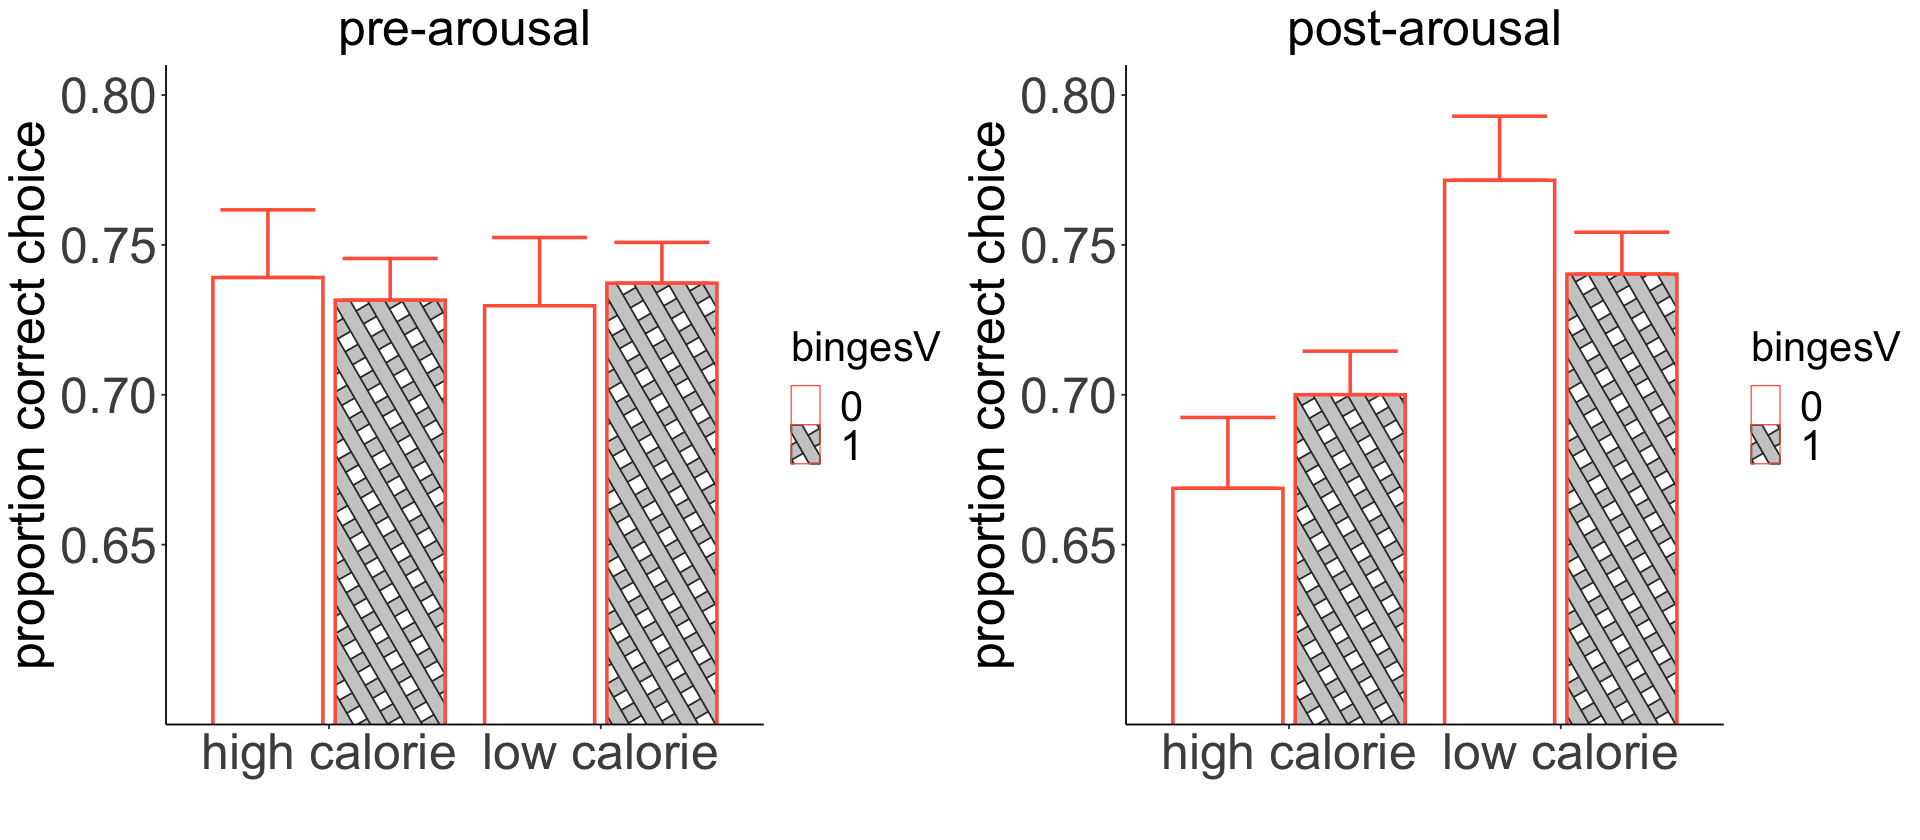

In [71]:
# subset by disordered eaters
HED<-subset(foodChoice, group=='HED')

# bingesV: 0 indicates none, 1+ indicates 1 or more

# participants with and without binge-eating episodes
options(repr.plot.width=16,repr.plot.height=7)

b1<- summarySEwithin(HED[HED$block==1,], measurevar="rewChoice", betweenvars="bingesV",withinvars=c("rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)
b2<- summarySEwithin(HED[HED$block==2,], measurevar="rewChoice", betweenvars="bingesV",withinvars=c("rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)

b1_binge<-b1[-c(5,6),]
b2_binge<-b2[-c(5,6),]

p1<-ggplot(b1_binge,aes(x=rewCat,y=rewChoice,fill=bingesV))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="#FF6347",position=position_dodge(width=0.9))+
  geom_col_pattern(aes(pattern=bingesV),position="dodge2",fill="white",color="#FF6347",size=1, pattern_density=0.5)+
  scale_pattern_manual(values=c("none","crosshatch"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('pre-arousal')

p2<-ggplot(b2_binge,aes(x=rewCat,y=rewChoice,fill=bingesV))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="#FF6347",position=position_dodge(width=0.9))+
  geom_col_pattern(aes(pattern=bingesV),position="dodge2",fill="white",color="#FF6347",size=1,pattern_density=0.5)+
  scale_pattern_manual(values=c("none","crosshatch"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('post-arousal')

grid.arrange(p1,p2,nrow=1,ncol=2)

In [72]:
# mixed-effects logistic regression predicting correct choice as a function of reward category X arousal block X binge behavior in DE
summary(glmer(rewChoice~rewCat*block*binges+scale(BMI)+(rewCat+block|participant),family=binomial,data=HED,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ rewCat * block * binges + scale(BMI) + (rewCat +  
    block | participant)
   Data: HED
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11517.3  11625.8  -5743.7  11487.3    10207 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5804 -0.9065  0.4809  0.6142  1.4394 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.1858   1.0890              
             rewCatloCal 0.5393   0.7344   -0.34      
             block       0.3280   0.5727   -0.84  0.04
Number of obs: 10222, groups:  participant, 128

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.33635    0.20796   6.426 1.31e-10 ***
rewCatloCal              -0.77550    0.23740  -3.267 0.001089 ** 
block                    -0.3

In [73]:
# bayesian mixed-effects logistic regression predicting correct choice as a function of reward category X arousal block X binge behavior in DE
summary(brm(rewChoice~rewCat*block*binges+scale(BMI)+(rewCat+block|participant),data = HED, iter=10000,family=bernoulli, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: rewChoice ~ rewCat * block * binges + scale(BMI) + (rewCat + block | participant) 
   Data: HED (Number of observations: 10222) 
  Draws: 4 chains, each with iter = 10000; warmup = 5000; thin = 1;
         total post-warmup draws = 20000

Group-Level Effects: 
~participant (Number of levels: 128) 
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                  1.10      0.12     0.87     1.35 1.00    10033
sd(rewCatloCal)                0.76      0.07     0.62     0.92 1.00     9571
sd(block)                      0.58      0.07     0.44     0.73 1.00     6459
cor(Intercept,rewCatloCal)    -0.32      0.13    -0.55    -0.06 1.00     6678
cor(Intercept,block)          -0.82      0.05    -0.90    -0.71 1.00     9257
cor(rewCatloCal,block)         0.02      0.15    -0.27     0.31 1.00     6195
                           Tail_ESS
sd(Intercept)                 13759
sd(rewCatloCal)               133

# Explicit food ratings

In [74]:
# subset by question type
health<-subset(foodRatings, question=='health')
calories<-subset(foodRatings, question=='calories')
liking<-subset(foodRatings, question=='liking')

In [75]:
# health ratings

# mixed-effects linear regression predicting health ratings as a function of group X food category
summary(mod<-lmer(response~group*foodCat+scale(BMI)+(foodCat|participant),data=health,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: response ~ group * foodCat + scale(BMI) + (foodCat | participant)
   Data: health
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 29983.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7586 -0.5914  0.0974  0.3465  4.4962 

Random effects:
 Groups      Name         Variance Std.Dev. Corr 
 participant (Intercept)  0.2054   0.4532        
             foodCatloCal 0.3246   0.5697   -0.79
 Residual                 0.9870   0.9935        
Number of obs: 10344, groups:  participant, 257

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)             2.079043   0.046410 272.139101  44.797  < 2e-16 ***
groupLED                0.205741   0.067085 289.578702   3.067 0.002367 ** 
foodCatloCal            3.596551   0.057909 262.074747  62.106  < 2e-16 ***
scale(BMI)             -0.007591   0.023281 258.10456

In [76]:
# bayesian mixed-effects linear regression predicting health ratings as a function of group X food category
summary(brm(response~1+group*foodCat+scale(BMI)+(foodCat|participant), data = health, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: response ~ 1 + group * foodCat + scale(BMI) + (foodCat | participant) 
   Data: health (Number of observations: 10344) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 257) 
                            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                   0.46      0.03     0.41     0.51 1.00     1245
sd(foodCatloCal)                0.57      0.03     0.51     0.64 1.00     1410
cor(Intercept,foodCatloCal)    -0.78      0.03    -0.84    -0.72 1.00     1186
                            Tail_ESS
sd(Intercept)                   1791
sd(foodCatloCal)                2064
cor(Intercept,foodCatloCal)     2279

Population-Level Effects: 
                      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                 2.08      0.05     1.99     2.17 1.00     1237
grou

In [77]:
# calorie estimation accuracy 

# mixed-effects linear regression predicting calorie accuracy as a function of group X food category
summary(mod<-lm(accuracy~group*foodCat+scale(BMI),data=calories)) #not enough trials for mixed effects


Call:
lm(formula = accuracy ~ group * foodCat + scale(BMI), data = calories)

Residuals:
     Min       1Q   Median       3Q      Max 
-2812.81   -20.83    48.62   207.87  2009.07 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -184.159     17.623 -10.450  < 2e-16 ***
groupLED              -103.112     25.700  -4.012 6.10e-05 ***
foodCatloCal           131.364     23.877   5.502 3.94e-08 ***
scale(BMI)              13.035      9.695   1.345 0.178839    
groupLED:foodCatloCal  116.222     33.572   3.462 0.000541 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 602.4 on 5147 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.02906,	Adjusted R-squared:  0.0283 
F-statistic: 38.51 on 4 and 5147 DF,  p-value: < 2.2e-16


In [78]:
# bayesian mixed-effects linear regression predicting calorie accuracy as a function of group X food category
summary(brm(accuracy~group*foodCat+scale(BMI), family=gaussian,data = calories, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: accuracy ~ group * foodCat + scale(BMI) 
   Data: calories (Number of observations: 5152) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept              -183.42     17.97  -219.10  -148.40 1.00     2189
groupLED               -103.40     25.87  -155.42   -52.91 1.00     2012
foodCatloCal            131.05     24.50    83.00   179.46 1.00     2053
scaleBMI                 12.98      9.74    -6.05    31.90 1.00     3895
groupLED:foodCatloCal   116.54     34.40    49.65   185.30 1.00     1916
                      Tail_ESS
Intercept                 2605
groupLED                  2204
foodCatloCal              2397
scaleBMI                  2658
groupLED:foodCatloCal     2116

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bu

In [79]:
# liking judgments 

# mixed-effects linear regression predicting liking ratings as a function of food category
summary(mod<-lmer(response~foodCat+scale(BMI)+(foodCat|participant),data=liking,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: response ~ foodCat + scale(BMI) + (foodCat | participant)
   Data: liking
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 36476.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3274 -0.5589  0.1731  0.6906  2.6465 

Random effects:
 Groups      Name         Variance Std.Dev. Corr 
 participant (Intercept)  0.5346   0.7312        
             foodCatloCal 1.0766   1.0376   -0.69
 Residual                 1.8195   1.3489        
Number of obs: 10320, groups:  participant, 257

Fixed effects:
              Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    4.55759    0.04933 255.40429  92.392  < 2e-16 ***
foodCatloCal  -0.36757    0.06997 255.82021  -5.254 3.14e-07 ***
scale(BMI)     0.03099    0.03561 254.80639   0.870    0.385    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       

In [80]:
# bayesian mixed-effects linear regression predicting health ratings as a function of food category
summary(brm(response~1+foodCat+scale(BMI)+(foodCat|participant), data = liking, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: response ~ 1 + foodCat + scale(BMI) + (foodCat | participant) 
   Data: liking (Number of observations: 10320) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 257) 
                            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                   0.73      0.04     0.66     0.81 1.00      763
sd(foodCatloCal)                1.04      0.05     0.94     1.15 1.01      722
cor(Intercept,foodCatloCal)    -0.69      0.04    -0.76    -0.61 1.00      651
                            Tail_ESS
sd(Intercept)                   1321
sd(foodCatloCal)                1182
cor(Intercept,foodCatloCal)      983

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        4.56      0.05     4.46     4.66 1.01      689     1279
foodCatloCal

In [81]:
# mixed-effects linear regression predicting liking ratings as a function of group X food category
summary(mod<-lmer(response~group*foodCat+scale(BMI)+(foodCat|participant),data=liking,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: response ~ group * foodCat + scale(BMI) + (foodCat | participant)
   Data: liking
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 36480.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3257 -0.5573  0.1740  0.6897  2.6450 

Random effects:
 Groups      Name         Variance Std.Dev. Corr 
 participant (Intercept)  0.5345   0.7311        
             foodCatloCal 1.0814   1.0399   -0.69
 Residual                 1.8195   1.3489        
Number of obs: 10320, groups:  participant, 257

Fixed effects:
                       Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             4.50983    0.07335 273.07035  61.484  < 2e-16 ***
groupLED                0.09408    0.10680 289.16531   0.881 0.379085    
foodCatloCal           -0.35569    0.10010 254.61434  -3.554 0.000453 ***
scale(BMI)              0.05174    0.04110 253.88877   1.259 

In [82]:
# bayesian mixed-effects linear regression predicting liking ratings as a function of group X food category
summary(brm(response~1+group*foodCat+scale(BMI)+(foodCat|participant), data = liking, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: response ~ 1 + group * foodCat + scale(BMI) + (foodCat | participant) 
   Data: liking (Number of observations: 10320) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 257) 
                            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                   0.73      0.04     0.67     0.81 1.00     1312
sd(foodCatloCal)                1.04      0.05     0.94     1.15 1.00     1051
cor(Intercept,foodCatloCal)    -0.69      0.04    -0.76    -0.61 1.00      894
                            Tail_ESS
sd(Intercept)                   2198
sd(foodCatloCal)                2168
cor(Intercept,foodCatloCal)     1773

Population-Level Effects: 
                      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                 4.51      0.07     4.36     4.65 1.01     1052
grou